## EDA And Feature Engineering Of Google Play Store Dataset

### 1. Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our objective is to find the most popular category, find the app with the largest number of installs, the app with the largest size, etc.

### 2. Data Collection.

The data consists of 20 columns and 10841 rows.

### steps we are going to follow:
1. data clearing 
2. Exploratory Data Analysis

## In data clearing we also perform object to numeric convert data presented in string format already 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df=pd.read_csv("googleplaystore.csv")


In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
# find missing value

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Observation
#### the dataset has missing value

In [9]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

### also make sure when we removing few data then make copy of orignal dataset and then perform operation on that

In [10]:
df[df['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df.drop(10472,axis=0,inplace=True)

In [23]:
df['Reviews']=df['Reviews'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [13]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [14]:
## we go through Review feature now we going to size 
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [15]:
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].replace('Varies with device',np.nan)



In [16]:
df['Size']=df['Size'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [17]:
## now we see Installs and Price columns dataset
df['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [18]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
## we have to remove in both columns + $ and , these three we have to remove
remove_itm=['+',',','$']
cols_to_clean= ['Installs','Price'] 
for item in remove_itm:
    for col in cols_to_clean:
        df[col]=df[col].str.replace(item,'')

In [20]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [21]:
df['Price']=df['Price'].astype(float)
df['Installs']=df['Installs'].astype(int)

In [22]:
df['Size'].isnull().sum()

np.int64(1695)

In [23]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])

In [24]:
df['Day']=df['Last Updated'].dt.day
df['Month']=df['Last Updated'].dt.month
df['Year']=df['Last Updated'].dt.year
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  object        
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

# EDA 

In [25]:
df[df.duplicated('App')].shape



(1181, 16)

### observation
- the dataset has duplicate records

In [26]:
df=df.drop_duplicates(subset=['App'],keep='first')

In [27]:
df[df.duplicated('App')].shape

(0, 16)

In [28]:
### explore more data aboute numerical and categorical feature
numerical_feature=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype =='O']

print('We have {} numerical feature : {} '.format(len(numerical_feature),numerical_feature))
print('We have {} categorical feature : {} '.format(len(categorical_feature),categorical_feature))


We have 8 numerical feature : ['Rating', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year'] 
We have 8 categorical feature : ['App', 'Category', 'Reviews', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver'] 


#### visualization diagram

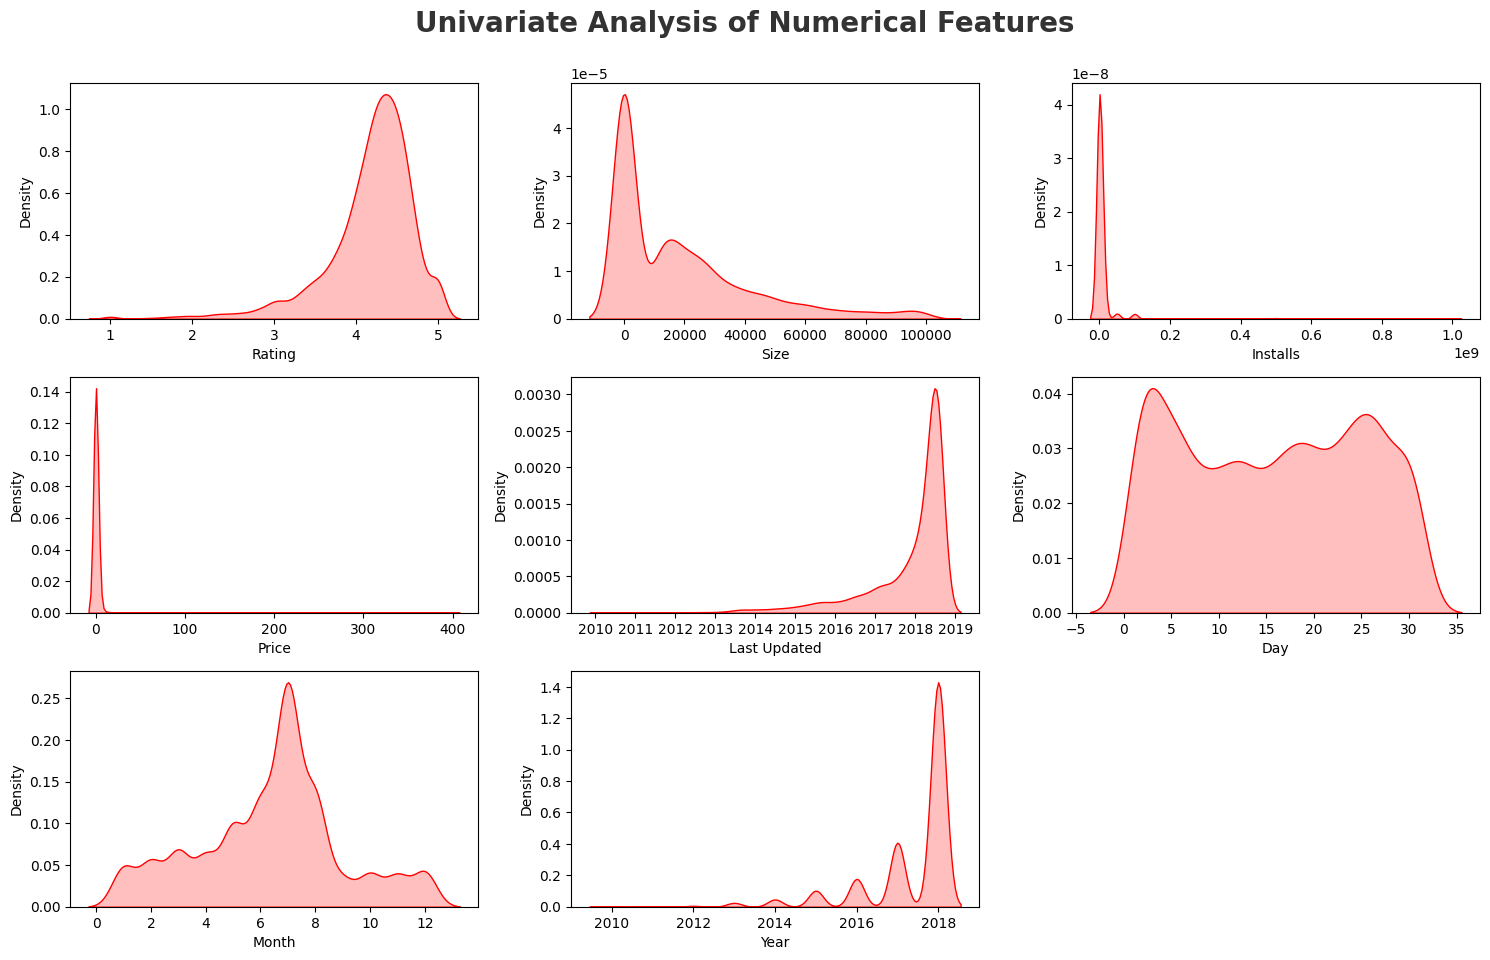

In [29]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features' , fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range (0,len(numerical_feature)):
    plt.subplot(5,3,i+1) # 5 row 3 columns of graph
    sns.kdeplot(x=df[numerical_feature[i]],shade=True,color='r')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()


### Observation
- Rating and year is left skewed while Review ,Size,Installs and Price is Right skewed 

#### Q.Which is most popular App category

<Axes: ylabel='count'>

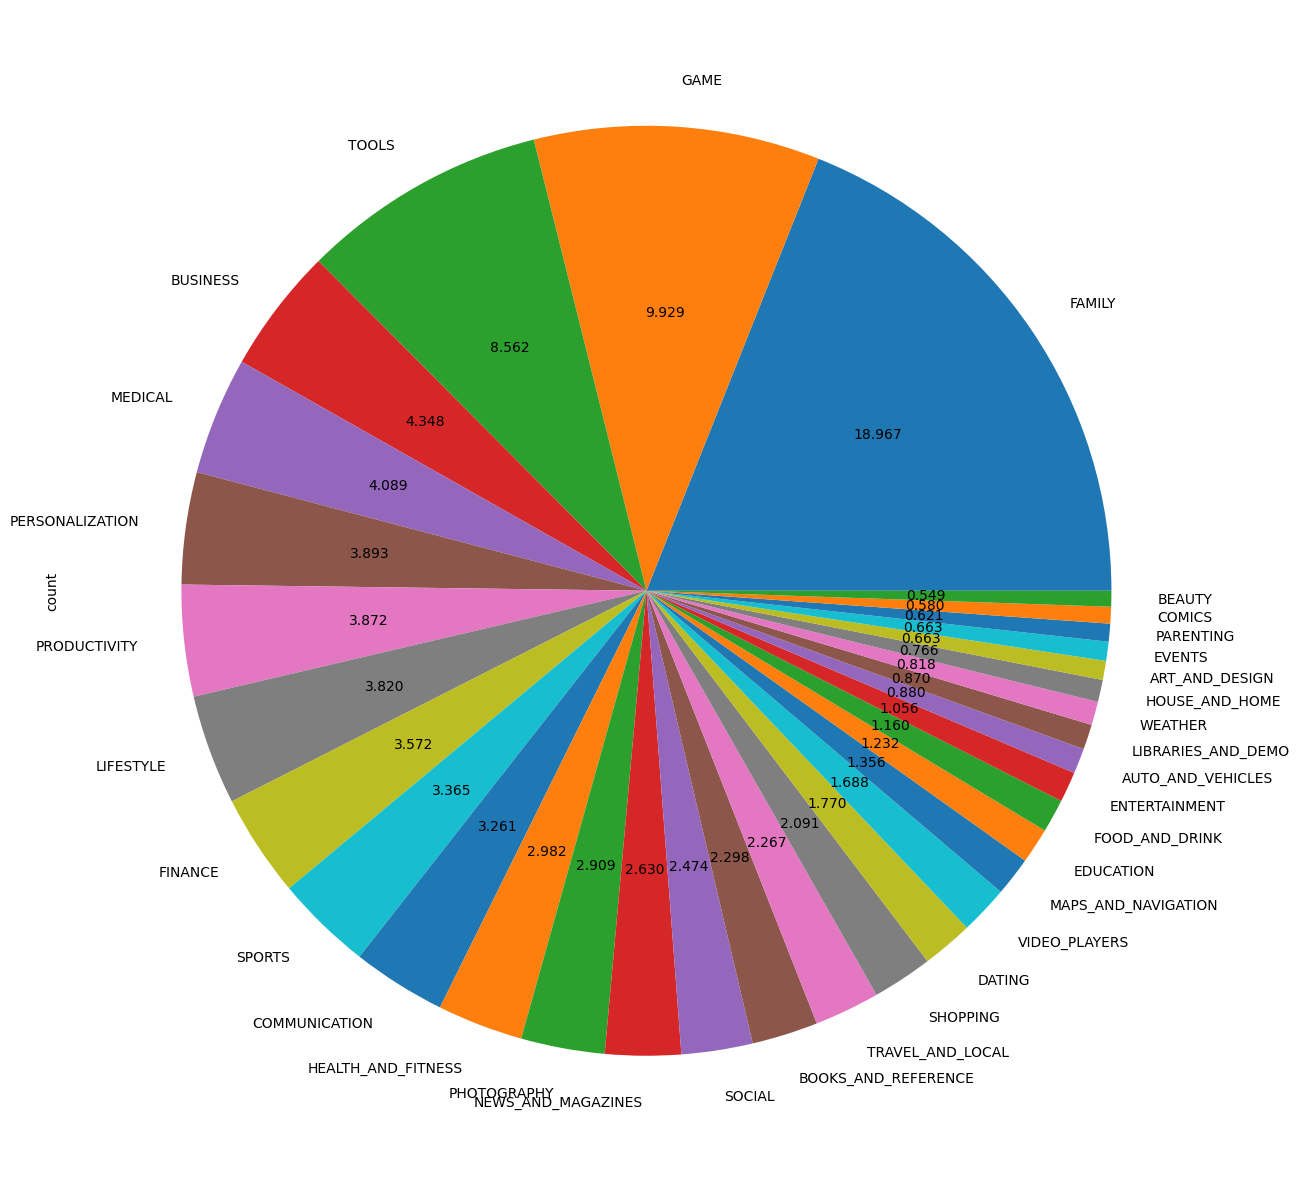

In [31]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct='%0.3f')

## Observation
1. there are more kinds of apps in play store which are under category of family, games and tools (means number of apps named here is so many in playstore)
2. Beauty , Comics ,arts ,whether, and paranting types of apps are very less in playstore 

In [32]:
## now for categorical feature for count plot
## what are  Top 10 app category?
category=pd.DataFrame(df['Category'].value_counts())


category.rename(columns={"count":'Count'},inplace=True)
category


,Count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


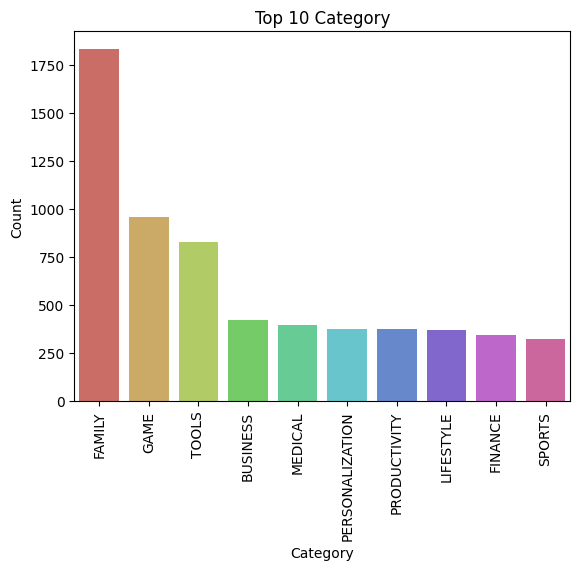

In [33]:
# top 10 in barchart
sns.barplot(x=category.index[:10],y='Count',data=category[:10],palette='hls')
plt.title('Top 10 Category')
plt.xticks(rotation=90)
plt.show()


### Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by games category which has 11% of the apps.
2.  Last number of apps belong to the beauty category with less than 1% of the total apps belongign to it.


#### Internal Assignmets
1. Which category has largest Number of installation ?
2. what are the top 5 most installed Apps in Each popular Category?
3. How many apps are there in Google play store which get 5 rating?

In [34]:
df.shape

(9659, 16)

In [35]:
df['Rating']=df['Rating'].fillna(df['Rating'].mean())
five_star_count = (df["Rating"] == 5).sum()



In [36]:
df[df["Rating"]==5].shape

(271, 16)

In [37]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018


2. for each category top 5 popular apps installed

In [38]:
top5_each_category = (
    df.sort_values("Installs", ascending=False)
      .groupby("Category")
      .head(5)
      .loc[:, ["Category", "App", "Installs"]]
)
top5_each_category.head()

,Category,App,Installs
2545,SOCIAL,Instagram,1000000000
3127,TRAVEL_AND_LOCAL,Google Street View,1000000000
152,BOOKS_AND_REFERENCE,Google Play Books,1000000000
1654,GAME,Subway Surfers,1000000000
3454,PRODUCTIVITY,Google Drive,1000000000


In [39]:
category_installs=df.groupby('Category')['Installs'].sum().sort_values(ascending=False)



category_installs

Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4427941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

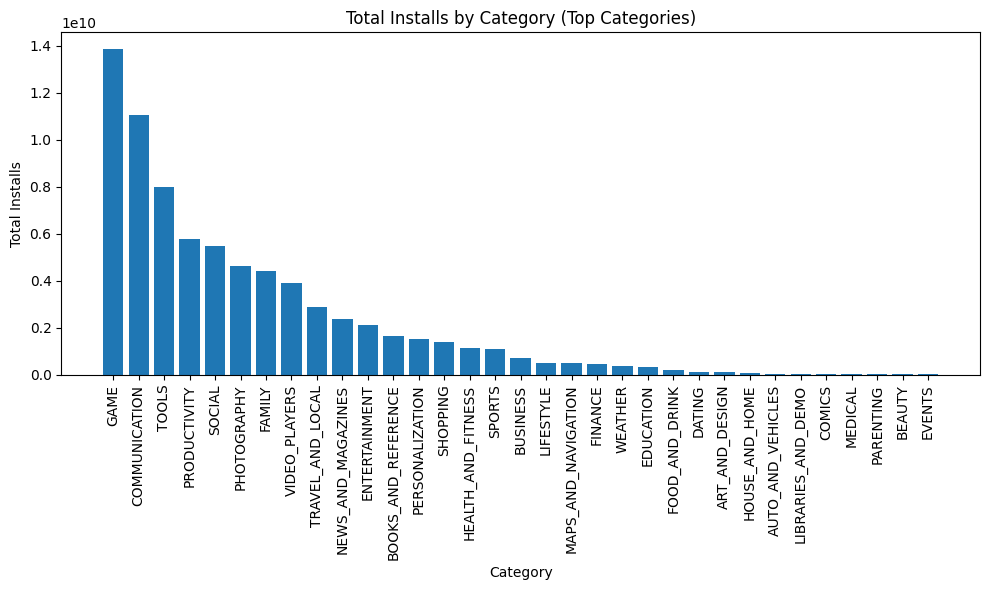

In [40]:
plt.figure(figsize=(10,6))
plt.bar(category_installs.index, category_installs.values)
plt.xticks(rotation=90)
plt.title("Total Installs by Category (Top Categories)")
plt.xlabel("Category")
plt.ylabel("Total Installs")
plt.tight_layout()
plt.show()

### Observation
- By showing graph we can say that Game category is most installed game  

In [41]:
s=df['Category'].value_counts().index


In [42]:
df_top = df[df["Category"].isin(category_installs.index)]
df_app=df_top.sort_values("Installs",ascending=False).groupby('Category').head(5).loc[:,['Category','App',"Installs"]]

In [43]:
df_app.head(8)


,Category,App,Installs
2545,SOCIAL,Instagram,1000000000
3127,TRAVEL_AND_LOCAL,Google Street View,1000000000
152,BOOKS_AND_REFERENCE,Google Play Books,1000000000
1654,GAME,Subway Surfers,1000000000
3454,PRODUCTIVITY,Google Drive,1000000000
3665,VIDEO_PLAYERS,YouTube,1000000000
3117,TRAVEL_AND_LOCAL,Maps - Navigate & Explore,1000000000
3234,TOOLS,Google,1000000000



TOP 5 POPULAR CATEGORIES BASED ON TOTAL INSTALLS 
Category
GAME             13878924415
COMMUNICATION    11038276251
TOOLS             8001771915
PRODUCTIVITY      5793091369
SOCIAL            5487867902
Name: Installs, dtype: int64

TOP 5 APPS IN EACH POPULAR CATEGORY 

 CATEGORY: GAME


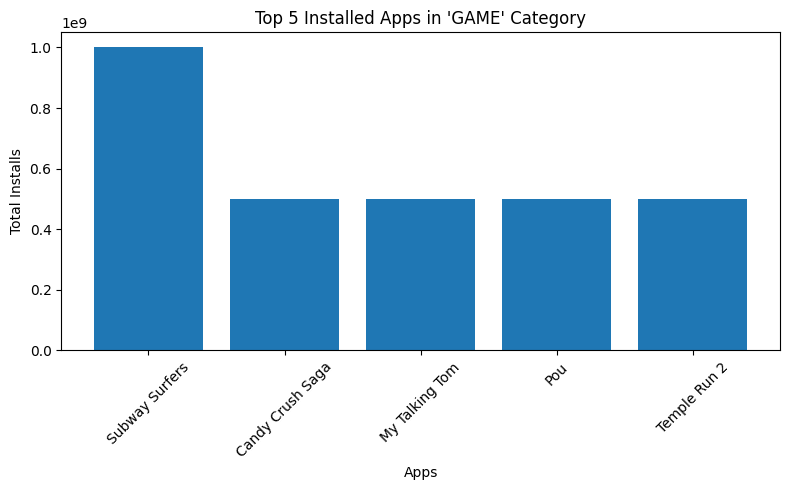


 CATEGORY: COMMUNICATION


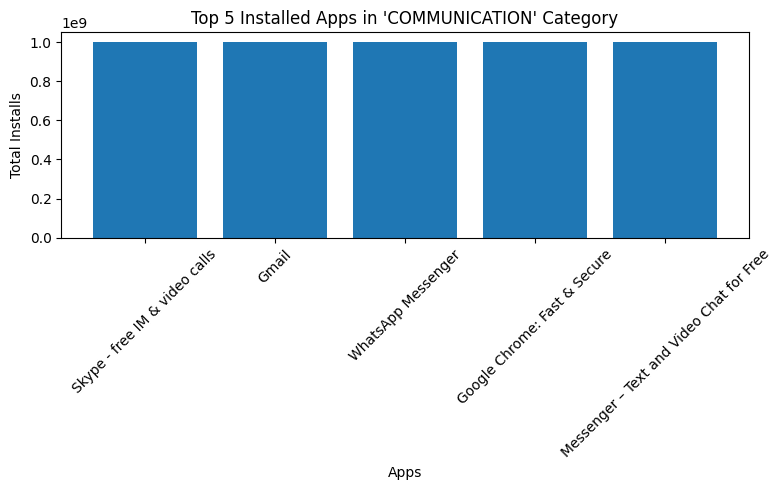


 CATEGORY: TOOLS


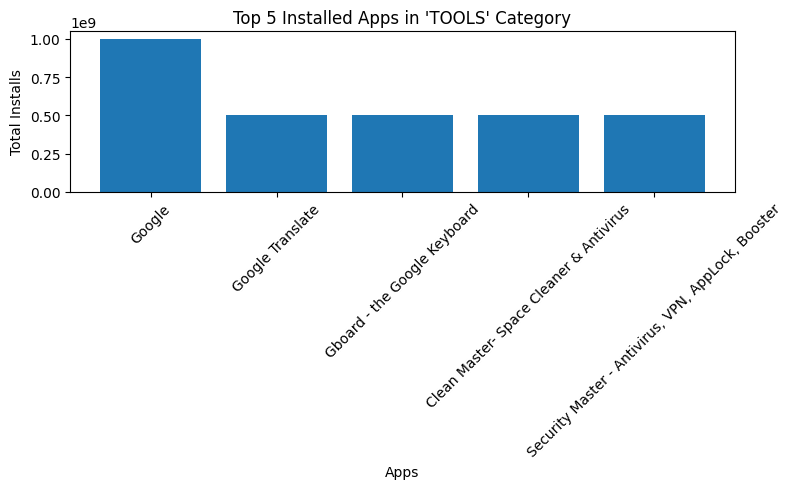


 CATEGORY: PRODUCTIVITY


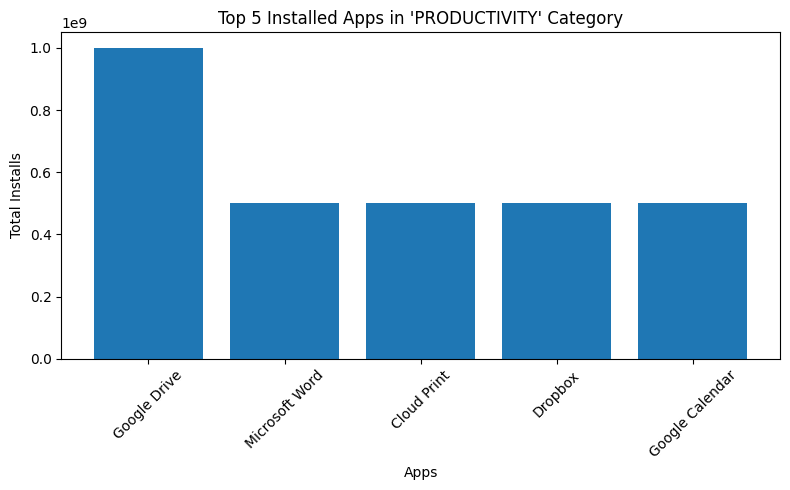


 CATEGORY: SOCIAL


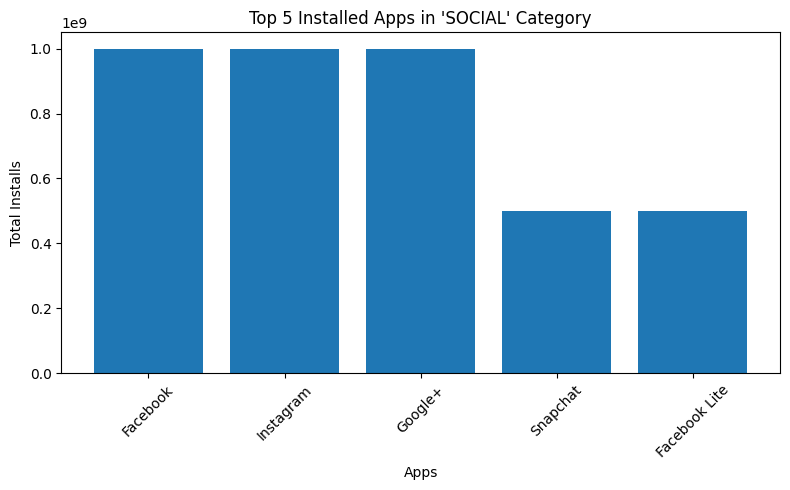

In [45]:
top_categories = (
    df.groupby("Category")["Installs"]
      .sum()
      .sort_values(ascending=False)
      .head(5)
)

print("\nTOP 5 POPULAR CATEGORIES BASED ON TOTAL INSTALLS ")
print(top_categories)

# STEP 2: For each top category → print top 5 apps inside
print("\nTOP 5 APPS IN EACH POPULAR CATEGORY ")

for category in top_categories.index:
    print(f"\n CATEGORY: {category}")
    top5_apps = (
        df[df["Category"] == category]
        .sort_values("Installs", ascending=False)
        .head(5)[["App", "Installs"]]
    )
    

    # ----------------------------
    # 5. Visualization
    # ----------------------------
    plt.figure(figsize=(8, 5))
    plt.bar(top5_apps["App"], top5_apps["Installs"])
    plt.title(f"Top 5 Installed Apps in '{category}' Category")
    plt.xlabel("Apps")
    plt.ylabel("Total Installs")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()